In [ ]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install yfinance
import yfinance as yf

df = yf.download('RELIANCE.NS', start='2022-04-14', end='2024-04-14', progress=False)

In [ ]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,2337.958252,2362.694580,2327.620605,2347.972656,2332.098633,4987112
2022-04-19,2361.033203,2462.563232,2354.618408,2437.457520,2420.978516,13070910
2022-04-20,2452.502441,2523.481201,2445.118408,2509.128418,2492.164795,12536120
2022-04-21,2539.079834,2574.246094,2521.635010,2567.877441,2550.516602,10854316
2022-04-22,2546.463867,2586.245117,2532.895752,2546.371582,2529.156250,7527077
...,...,...,...,...,...,...
2024-04-05,2921.750000,2941.600098,2912.000000,2920.199951,2920.199951,3721149
2024-04-08,2925.949951,2981.949951,2922.000000,2971.949951,2971.949951,4178559
2024-04-09,2978.000000,2979.600098,2925.000000,2927.300049,2927.300049,3535707


In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2022-04-18,-10.014404,35.073975
2022-04-19,-76.424316,107.944824
2022-04-20,-56.625977,78.362793
2022-04-21,-28.797607,52.611084
2022-04-22,0.092285,53.349365


In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:
#accuracy score
y_pred = cls.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.47474747474747475


In [ ]:
df['Predicted_Signal'] = cls.predict(X)

In [ ]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [ ]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [ ]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2022-04-18,2337.958252,2362.694580,2327.620605,2347.972656,2332.098633,4987112,-10.014404,35.073975,0,NaN,NaN,NaN
2022-04-19,2361.033203,2462.563232,2354.618408,2437.457520,2420.978516,13070910,-76.424316,107.944824,1,0.038112,0.000000,0.038112
2022-04-20,2452.502441,2523.481201,2445.118408,2509.128418,2492.164795,12536120,-56.625977,78.362793,1,0.029404,0.029404,0.067516
2022-04-21,2539.079834,2574.246094,2521.635010,2567.877441,2550.516602,10854316,-28.797607,52.611084,1,0.023414,0.023414,0.090930
2022-04-22,2546.463867,2586.245117,2532.895752,2546.371582,2529.156250,7527077,0.092285,53.349365,0,-0.008375,-0.008375,0.082555
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05,2921.750000,2941.600098,2912.000000,2920.199951,2920.199951,3721149,1.550049,29.600098,0,-0.001931,-0.000000,0.264291
2024-04-08,2925.949951,2981.949951,2922.000000,2971.949951,2971.949951,4178559,-46.000000,59.949951,1,0.017721,0.000000,0.282013
2024-04-09,2978.000000,2979.600098,2925.000000,2927.300049,2927.300049,3535707,50.699951,54.600098,0,-0.015024,-0.015024,0.266989


In [ ]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2022-04-18,2337.958252,2362.694580,2327.620605,2347.972656,2332.098633,4987112,-10.014404,35.073975,0,NaN,NaN,NaN,NaN
2022-04-19,2361.033203,2462.563232,2354.618408,2437.457520,2420.978516,13070910,-76.424316,107.944824,1,0.038112,0.000000,0.038112,0.000000
2022-04-20,2452.502441,2523.481201,2445.118408,2509.128418,2492.164795,12536120,-56.625977,78.362793,1,0.029404,0.029404,0.067516,0.029404
2022-04-21,2539.079834,2574.246094,2521.635010,2567.877441,2550.516602,10854316,-28.797607,52.611084,1,0.023414,0.023414,0.090930,0.052818
2022-04-22,2546.463867,2586.245117,2532.895752,2546.371582,2529.156250,7527077,0.092285,53.349365,0,-0.008375,-0.008375,0.082555,0.044443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05,2921.750000,2941.600098,2912.000000,2920.199951,2920.199951,3721149,1.550049,29.600098,0,-0.001931,-0.000000,0.264291,0.191232
2024-04-08,2925.949951,2981.949951,2922.000000,2971.949951,2971.949951,4178559,-46.000000,59.949951,1,0.017721,0.000000,0.282013,0.191232
2024-04-09,2978.000000,2979.600098,2925.000000,2927.300049,2927.300049,3535707,50.699951,54.600098,0,-0.015024,-0.015024,0.266989,0.176208


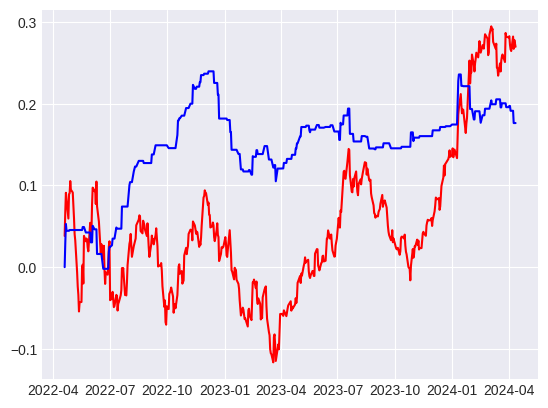

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')